In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Defining a data cleansing function
def dataframe(country):
    df = pd.read_csv("./source_data/owid-covid-data.csv")
    df['date'] = pd.to_datetime(df['date'])
    df_country = df.loc[(df["location"]==country)]
    df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]] = df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]].fillna(method="ffill")
    df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]] = df_country[["reproduction_rate","stringency_index","total_cases","people_fully_vaccinated"]].fillna(value=0)
    df_country["total_cases_pct"] = df_country["total_cases"].pct_change()
    df_country["vaccination_rate"] = df_country["people_fully_vaccinated"]/df_country["population"]*100
    df_country = df_country.loc[(df_country["people_fully_vaccinated"] >0)]
    return df_country

C:\Users\Enzo\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-47-f7b27601349e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country["total_cases_pct"] = df_country["total_cases"].pct_change()
<ipython-input-47-f7b27601349e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

      ----- CORRELATION COEFFICIENT -----

 Correlattion Coefficient [stringency_index , total_cases_pct]: 0.6551079287890513

------------------------------------------------

 Correlattion Coefficient [vaccination_rate , total_cases_pct]: -0.4952192203243305


      ----- GRAPH: CORRELATION COEFFICIENT -----


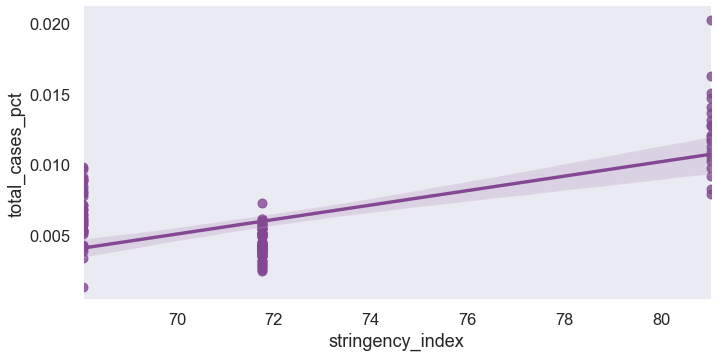

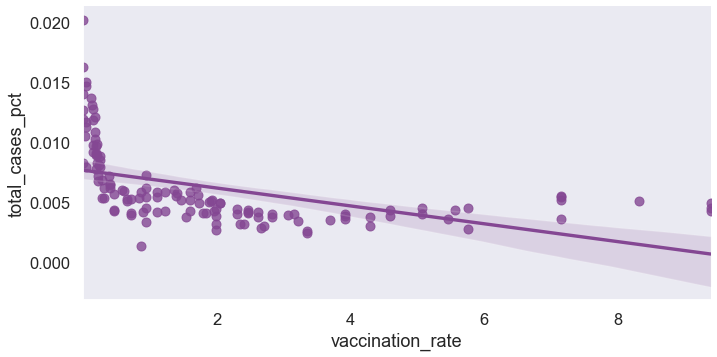

In [49]:
# Final output

df_country = dataframe("Philippines")

sns.set_style('dark')
sns.set_context("talk")
sns.set_palette('PRGn')

print("      ----- CORRELATION COEFFICIENT -----\n")
correlation_test1=df_country.filter(['stringency_index', 'total_cases_pct'], axis=1)
print(f" Correlattion Coefficient [{correlation_test1.corr(method='pearson').index[0]} , {correlation_test1.corr(method='pearson').index[1]}]: {correlation_test1.corr(method='pearson').iloc[0,1]}")

print("\n------------------------------------------------\n")
correlation_test2=df_country.filter(['vaccination_rate', 'total_cases_pct'], axis=1)
print(f" Correlattion Coefficient [{correlation_test2.corr(method='pearson').index[0]} , {correlation_test2.corr(method='pearson').index[1]}]: {correlation_test2.corr(method='pearson').iloc[0,1]}")

print("\n\n      ----- GRAPH: CORRELATION COEFFICIENT -----")
sns.lmplot(x=correlation_test1.corr(method='pearson').index[0], y=correlation_test1.corr(method='pearson').index[1], data=df_country, aspect=2)
sns.lmplot(x=correlation_test2.corr(method='pearson').index[0], y=correlation_test2.corr(method='pearson').index[1], data=df_country, aspect=2)


